In [22]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [23]:
pickle_in = open('newData.pickle', 'rb')
data = pickle.load(pickle_in)
pickle_in.close()

In [24]:
data.head()

,Age,Gender,Door to needle time (min ),Door-door time,CODING WINDOW,MRS,Hyper tension 1-yes 2- No,DM,Blood Sugar at the time of admission ( mg/dl),Systolic BP,...,Dose of Actilyse/ Weight(mg),HAGE,NIHSS on admission.1,NIHSS after 1 hr,NIHSS after 6 hrs,coding of Complications,NeuroDeficit_1,NeuroDeficit_2,NeuroDeficit_3,NeuroDeficit_4
0,65,1,-0.742893,-0.526186,1,4,1,1,4.400156,0.000954,...,-0.903152,1,14,12.0,10.0,1,1,0,0,0
1,38,1,-0.183531,0.428483,1,4,0,0,-0.676106,-0.704781,...,-0.112787,1,13,10.0,10.0,1,1,0,0,0
2,45,2,-0.463212,-0.526186,1,5,1,0,-0.402066,0.353821,...,-0.112787,2,19,19.0,19.0,3,0,0,0,1
3,50,1,-0.183531,0.587594,1,4,1,1,2.312233,0.353821,...,-0.112787,1,6,3.0,NaN,1,1,0,0,0
4,45,1,0.375831,0.269371,1,5,1,0,-0.858799,0.353821,...,-0.112787,1,15,5.0,6.0,1,0,1,0,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 24 columns):
Age                                              185 non-null int64
Gender                                           185 non-null int64
Door to needle time (min )                       185 non-null float64
Door-door time                                   185 non-null float64
CODING WINDOW                                    185 non-null int64
MRS                                              185 non-null int64
Hyper tension 1-yes              2- No           185 non-null int64
DM                                               185 non-null int64
Blood Sugar at the time of admission ( mg/dl)    185 non-null float64
Systolic BP                                      185 non-null float64
Diastolic BP                                     185 non-null float64
CODE SMOKER 1 yes - 2 NO                         185 non-null int64
History of Stroke-1 yes - 2 No                   185 non-null int64
C

## Exploratory Data Analysis

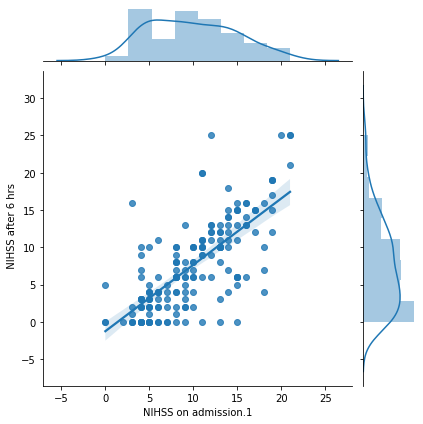

In [26]:
sns.jointplot(x='NIHSS on admission.1',y='  NIHSS after 6 hrs',data=data,kind='reg')

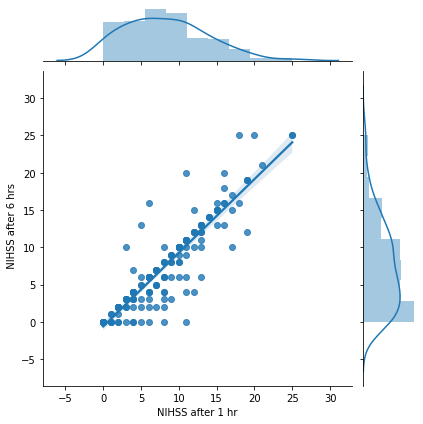

In [27]:
sns.jointplot(x='NIHSS after 1 hr',y='  NIHSS after 6 hrs',data=data,kind='reg')

In [28]:
reduced_data = data[['NIHSS on admission.1', 'NIHSS after 1 hr', '  NIHSS after 6 hrs']]

In [29]:
data_to_predict = reduced_data[reduced_data['  NIHSS after 6 hrs'].isnull()]

In [30]:
reduced_data.dropna(subset = ['  NIHSS after 6 hrs'], inplace = True)

C:\Users\Varun Chandra\.conda\envs\tf_gpu36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Partitioning Data

In [31]:
x_train = np.array(reduced_data[['NIHSS on admission.1', 'NIHSS after 1 hr']])
y_train = np.array(reduced_data['  NIHSS after 6 hrs'])

## Linear Regression

In [32]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction

In [33]:
data_to_predict

,NIHSS on admission.1,NIHSS after 1 hr,NIHSS after 6 hrs
3,6,3.0,NaN
5,9,7.0,NaN
13,5,4.0,NaN
44,10,8.0,NaN
45,9,7.0,NaN


In [34]:
data_to_predict['Predicted NIHSS after 6 hr'] = lm.predict(np.array(data_to_predict[['NIHSS on admission.1', 'NIHSS after 1 hr']]))
data_to_predict

C:\Users\Varun Chandra\.conda\envs\tf_gpu36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,NIHSS on admission.1,NIHSS after 1 hr,NIHSS after 6 hrs,Predicted NIHSS after 6 hr
3,6,3.0,NaN,2.333104
5,9,7.0,NaN,6.286668
13,5,4.0,NaN,3.477211
44,10,8.0,NaN,7.252814
45,9,7.0,NaN,6.286668


## Filling in the values in the original dataset

In [35]:
new_data = data.copy()

In [36]:
lis = data_to_predict.index.to_list()

In [37]:
for i in lis:
    new_data.loc[i, '  NIHSS after 6 hrs'] = round(data_to_predict.loc[i, 'Predicted NIHSS after 6 hr'])

In [38]:
new_data.loc[lis, ['NIHSS on admission.1', 'NIHSS after 1 hr', '  NIHSS after 6 hrs']]

,NIHSS on admission.1,NIHSS after 1 hr,NIHSS after 6 hrs
3,6,3.0,2.0
5,9,7.0,6.0
13,5,4.0,3.0
44,10,8.0,7.0
45,9,7.0,6.0


In [39]:
new_data['  NIHSS after 6 hrs'].isnull().sum()

0

In [42]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 24 columns):
Age                                              185 non-null int64
Gender                                           185 non-null int64
Door to needle time (min )                       185 non-null float64
Door-door time                                   185 non-null float64
CODING WINDOW                                    185 non-null int64
MRS                                              185 non-null int64
Hyper tension 1-yes              2- No           185 non-null int64
DM                                               185 non-null int64
Blood Sugar at the time of admission ( mg/dl)    185 non-null float64
Systolic BP                                      185 non-null float64
Diastolic BP                                     185 non-null float64
CODE SMOKER 1 yes - 2 NO                         185 non-null int64
History of Stroke-1 yes - 2 No                   185 non-null int64
C

## Saving the new Dataset

In [40]:
data_pickle = open('final_predicted_data.pickle', 'wb')
pickle.dump(new_data, data_pickle)
data_pickle.close()

In [41]:
new_data.to_excel('final_predicted_data.xlsx')